We have three kinds of blobs: red blobs are about as tall as they are wide, blue blobs are about twice as tall as they are wide, and green blobs are less tall the wider they are, and are also usually less wide than blue or red blobs. Let's plot the blobs on a 2D space then get a classification algorithm going!

In [1]:
import random as r
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix
r.seed(1)

Let's make some blobs!

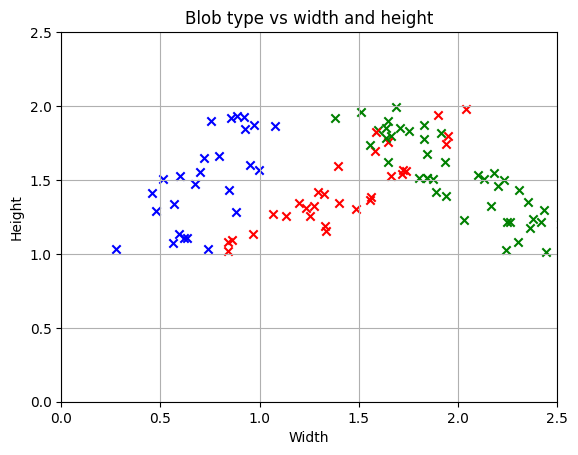

In [2]:
def generateBlob():
    blobType = r.choice(["Red", "Blue", "Green"])
    height = r.uniform(1, 2)
    width = r.uniform(-0.25, 0.25)
    width += height if blobType == "Red" else 0.5 * height if blobType == "Blue" else 3.5 - height
    return(width, height, blobType)

population = [generateBlob() for c in range(100)]
for blob in population:
    plt.scatter(blob[0], blob[1], color = blob[2], marker = "x")
plt.ylim(0, 2.5)
plt.xlim(0, 2.5)
plt.ylabel("Height")
plt.xlabel("Width")
plt.title("Blob type vs width and height")
plt.grid(True)
plt.show()

Let's make a classifier and plot the clusters. We'll change the colors up to make it clear we're referring to predicted labels, not the actual blob colors.

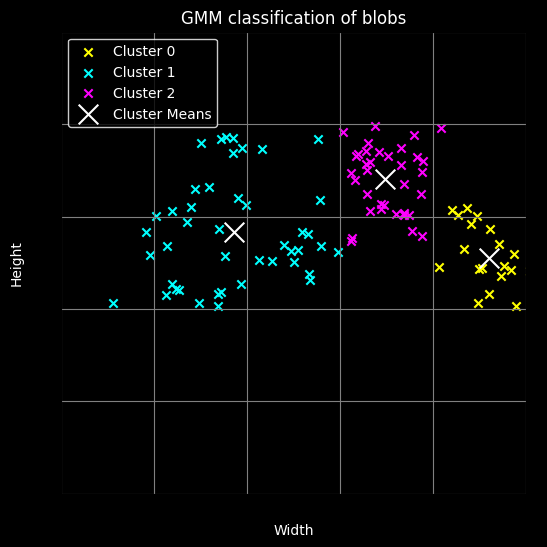

In [3]:
dataX = np.array([(blob[0], blob[1]) for blob in population])
dataY = [blob[2] for blob in population]

gmm = GaussianMixture(n_components = 3, random_state = 42)
labels = gmm.fit_predict(dataX)

classifierColors = ["Yellow", "Cyan", "Magenta"]

plt.figure(figsize = (6, 6), facecolor = "black")
ax = plt.gca()
ax.set_facecolor("black")

for i in range(3):
    clusterPoints = dataX[labels == i]
    plt.scatter(clusterPoints[:,0], clusterPoints[:,1], 
                marker = "x", color = classifierColors[i], 
                label = f"Cluster {i}")
centers = gmm.means_
plt.scatter(centers[:,0], centers[:,1], 
            color = "white", marker = "x", s = 200, 
            label = "Cluster Means")

plt.ylim(0, 2.5)
plt.xlim(0, 2.5)
plt.ylabel("Height", color = "white")
plt.xlabel("Width", color = "white")
plt.title("GMM classification of blobs", color = "white")
plt.legend(facecolor="black", edgecolor = "white", labelcolor = "white")
plt.grid(True, color="gray")
plt.show()


Let's make a new population and see how our classifier does! We'll plot a confusion matrix to see how well we're doing. The darker the downwards diagonal, the better we're doing.

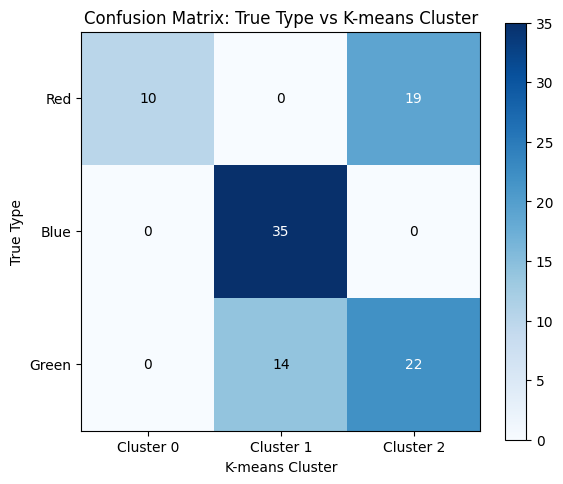

In [6]:
newPopulation = [generateBlob() for c in range(100)]
dataX = np.array([(blob[0], blob[1]) for blob in newPopulation])
labels = gmm.predict(dataX)

type_to_int = {"Red": 2, "Blue": 1, "Green": 0}
trueLabels = [type_to_int[blob[2]] for blob in newPopulation]
cm = confusion_matrix(trueLabels, labels)
plt.figure(figsize = (6,5))
plt.imshow(cm, interpolation = "nearest", cmap = "Blues")
plt.title("Confusion Matrix: True Type vs GMM Cluster")
plt.colorbar()

plt.xticks(range(3), [f"Cluster {i}" for i in range(3)])
plt.yticks(range(3), ["Red", "Blue", "Green"])
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 ha="center", va="center",
                 color="white" if cm[i, j] > cm.max()/2 else "black")
plt.ylabel("True Type")
plt.xlabel("K-means Cluster")
plt.tight_layout()
plt.show()

We almost always get blue right, but we get red wrong more often than not! Check the K-Means notebook to see how they do.